## Introduction

## Import Python Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Loading the Data

In [3]:
df = pd.read_csv('website_wata.csv')

In [4]:
df.head()

,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
0,5,11.051381,0.230652,Organic,3.890460,3,1.0
1,4,3.429316,0.391001,Social,8.478174,0,1.0
2,4,1.621052,0.397986,Organic,9.636170,2,1.0
3,5,3.629279,0.180458,Organic,2.071925,3,1.0
4,5,4.235843,0.291541,Paid,1.960654,5,1.0


In [5]:
df.describe()

,Page Views,Session Duration,Bounce Rate,Time on Page,Previous Visits,Conversion Rate
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,4.950500,3.022045,0.284767,4.027439,1.978500,0.982065
std,2.183903,3.104518,0.159781,2.887422,1.432852,0.065680
min,0.000000,0.003613,0.007868,0.068515,0.000000,0.343665
25%,3.000000,0.815828,0.161986,1.935037,1.000000,1.000000
50%,5.000000,1.993983,0.266375,3.315316,2.000000,1.000000
75%,6.000000,4.197569,0.388551,5.414627,3.000000,1.000000
max,14.000000,20.290516,0.844939,24.796182,9.000000,1.000000


In [6]:
def check(df):
    list = []
    columns = df.columns
    for col in columns:
        data_types = df[col].dtypes
        unique_values = df[col].nunique()
        null_values = df[col].isnull().sum()
        list.append([col, data_types, unique_values, null_values])
    df_check = pd.DataFrame(list)
    df_check.columns = ['column', 'data types', 'unique values', 'null values']
    return df_check
check(df)

,column,data types,unique values,null values
0,Page Views,int64,15,0
1,Session Duration,float64,2000,0
2,Bounce Rate,float64,2000,0
3,Traffic Source,object,5,0
4,Time on Page,float64,2000,0
5,Previous Visits,int64,10,0
6,Conversion Rate,float64,228,0


## Analysis

In [8]:
red = '#b40426'
blue = '#4169E1'
custom_palette = [blue, red]

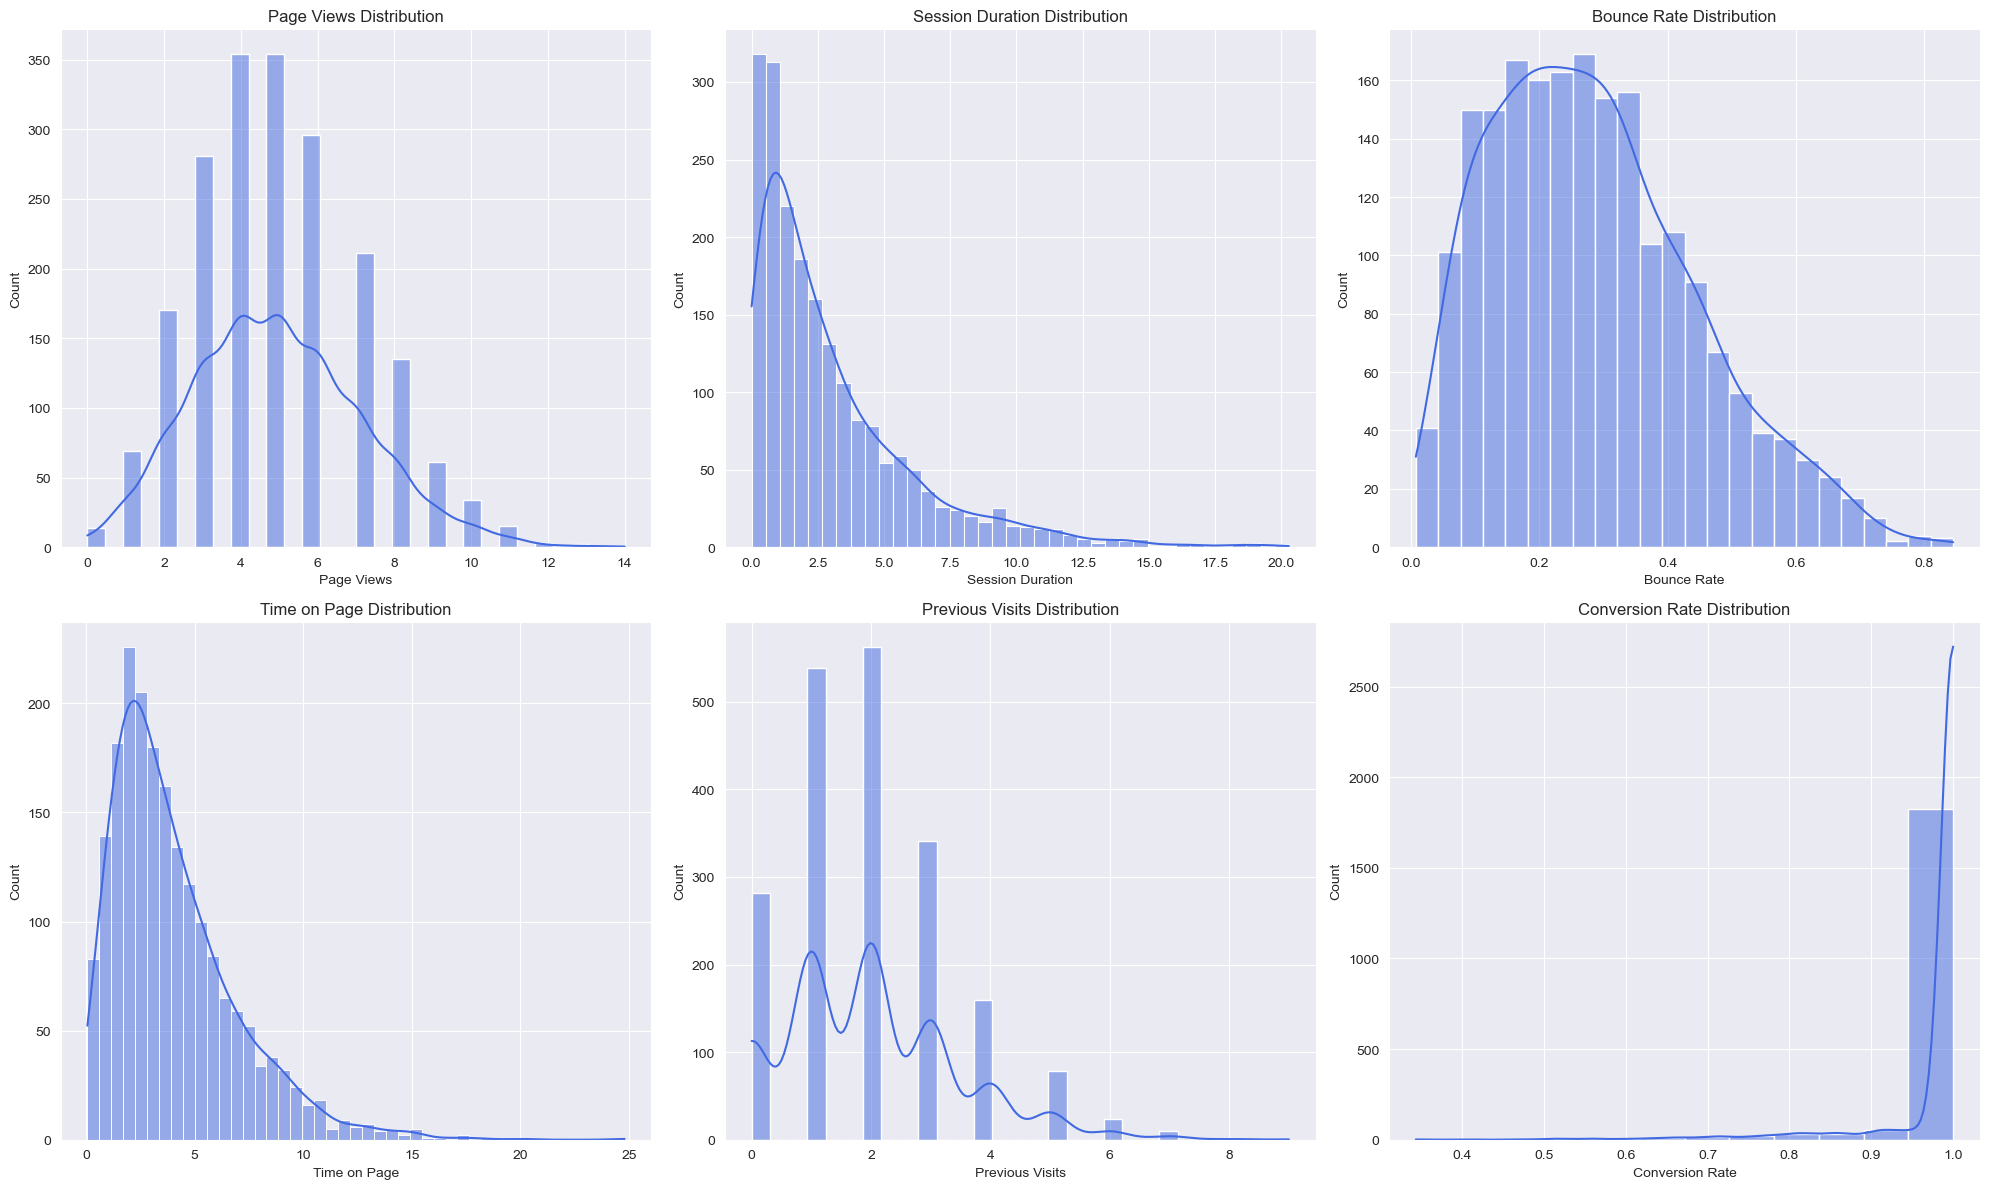

In [14]:
fig, axs = plt.subplots(2, 3, figsize=(20, 12))
sns.set_style('darkgrid')

axs[0, 0].set_title('Page Views Distribution')
sns.histplot(df['Page Views'], ax=axs[0, 0], color=custom_palette[0], kde=True)

axs[0, 1].set_title('Session Duration Distribution')
sns.histplot(df['Session Duration'], ax=axs[0, 1], color=custom_palette[0], kde=True)

axs[0, 2].set_title('Bounce Rate Distribution')
sns.histplot(df['Bounce Rate'], ax=axs[0, 2], color=custom_palette[0], kde=True)

axs[1, 0].set_title('Time on Page Distribution')
sns.histplot(df['Time on Page'], ax=axs[1, 0], color=custom_palette[0], kde=True)

axs[1, 1].set_title('Previous Visits Distribution')
sns.histplot(df['Previous Visits'], ax=axs[1, 1], color=custom_palette[0], kde=True)

axs[1, 2].set_title('Conversion Rate Distribution')
sns.histplot(df['Conversion Rate'], ax=axs[1, 2], color=custom_palette[0], kde=True)

plt.tight_layout()
plt.show()

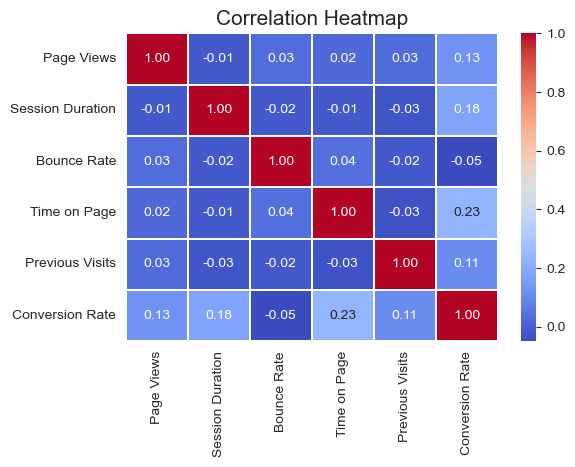

In [26]:
heatmap_df = df.drop('Traffic Source', axis=1)

fig = plt.gcf()
fig.set_size_inches(6, 4)
plt.title('Correlation Heatmap', size=15)
sns.heatmap(heatmap_df.corr(), annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.2)
plt.show()